<a href="https://colab.research.google.com/github/ldobishinsky/Python-For-Data-Analysis/blob/master/Copy_of_Introduction_to_Pandas_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Exercise - Core Pandas Concepts

### Prelude - Importing Libraries
Typically, it's best practice to import all of the packages (aka libraries) that you will need for a notebook/script/project right at the beginning.  For almost all data-related projects, you will start by importing numpy (numerical Python) and Pandas.  Its traditional to abbrieviate these two libraries as np and pd respectively, using the 'as' keyword.

**In the below cell, import numpy and pandas as np and pd respectively**

In [0]:
import numpy as np
import pandas as pd

### Part 1:  Reading Data

In the below section, you will read and write data to/from pandas dataframes.  The files you will be reading from have the same data, but slightly different quirks that will necessitate slightly different approaches to reading the data.  Feel free to open the files in Excel to see what these quirks might be, and, as always, use Google to seek resources.

**1a.**  Read the file https://github.com/Robmattles/Python-For-Data-Analysis/raw/master/Data%20Files/enronEnriched.csv from the Module 4 folder into a pandas dataframe 

In [5]:
df=pd.read_csv(r'https://github.com/Robmattles/Python-For-Data-Analysis/raw/master/Data%20Files/enronEnriched.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,dollarValueMentionedinMessage,messageLength
0,0,500000,<30866805.1075852350908.JavaMail.evans@thyme>,2001-07-13 19:47:20,frozenset({'donna.fulton@enron.com'}),"frozenset({'david.fairley@enron.com', 'matt.lo...","RTO Orders - Grid South, SE Trans, SPP and Ent...","Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Kean, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Southeast RTO orders are out and have foll...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2570
1,1,500001,<26879196.1075852350962.JavaMail.evans@thyme>,2001-07-12 11:36:58,frozenset({'david.delainey@enron.com'}),"frozenset({'john.greg@enron.com', 'jeff.skilli...",More UC/CSU Info,"Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/...","Greg Whalley/HOU/ECT@ENRON, Lavorato, John </O...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,---------------------- Forwarded by David W De...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,3761
2,2,500002,<15339082.1075852350988.JavaMail.evans@thyme>,2001-07-10 00:47:51,frozenset({'jeff.dasovich@enron.com'}),"frozenset({'linda.robertson@enron.com', 'harry...",California Update 07.09.01,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","skean@enron.com, Shapiro, Richard </O=ENRON/OU...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Bond Legislation The Democrats in the Asse...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,1348
3,3,500003,<5265469.1075852351013.JavaMail.evans@thyme>,2001-07-06 20:45:05,frozenset({'richard.shapiro@enron.com'}),"frozenset({'greg.whalley@enron.com', 'john.lav...",Davis & Company -- incompetence personified,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,37.0,2592
4,4,500004,<13706905.1075852351066.JavaMail.evans@thyme>,2001-07-06 20:44:33,frozenset({'richard.shapiro@enron.com'}),"frozenset({'greg.whalley@enron.com', 'john.lav...",Link to DWR contract info,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,43.0,1774


**1b.** Read the file enronEnrichedNonLatin.csv from the Module 4 folder into a pandas dataframe. This file has strange characters

In [7]:
df1b=pd.read_csv(r'https://github.com/Robmattles/Python-For-Data-Analysis/raw/master/Data%20Files/enronEnrichedNonLatin.csv', encoding='ISO-8859-1')
df1b.head()

,Index,Unnamed: 0,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,dollarValueMentionedinMessage,messageLength
0,0,®,"frozenset({'david.fairley@enron.com', 'matt.lo...","RTO Orders - Grid South, SE Trans, SPP and Ent...","Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Kean, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Southeast RTO orders are out and have foll...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2570
1,1,®,"frozenset({'john.greg@enron.com', 'jeff.skilli...",More UC/CSU Info,"Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/...","Greg Whalley/HOU/ECT@ENRON, Lavorato, John </O...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,---------------------- Forwarded by David W De...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,3761
2,2,®,"frozenset({'linda.robertson@enron.com', 'harry...",California Update 07.09.01,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","skean@enron.com, Shapiro, Richard </O=ENRON/OU...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Bond Legislation The Democrats in the Asse...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,1348
3,3,®,"frozenset({'greg.whalley@enron.com', 'john.lav...",Davis & Company -- incompetence personified,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,37.0,2592
4,4,®,"frozenset({'greg.whalley@enron.com', 'john.lav...",Link to DWR contract info,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,43.0,1774


**1c.** Read the file enronEnrichedWithClass.csv from the Module 4 folder into a pandas dataframe.  This file has a fake classification banner in the first row.


In [9]:
df1c=pd.read_csv(r'https://github.com/Robmattles/Python-For-Data-Analysis/raw/master/Data%20Files/enronEnrichedWithClass.csv', skiprows=1 )
df1c.head()

,Index,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,Cat_4_level_2,Cat_4_weight,Cat_5_level_1,Cat_5_level_2,Cat_5_weight,Cat_6_level_1,Cat_6_level_2,Cat_6_weight,Cat_7_level_1,Cat_7_level_2,Cat_7_weight,Cat_8_level_1,Cat_8_level_2,Cat_8_weight,Cat_9_level_1,Cat_9_level_2,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled,dollarValueMentionedinMessage,messageLength
0,0,500000,<30866805.1075852350908.JavaMail.evans@thyme>,7/13/2001 19:47,frozenset({'donna.fulton@enron.com'}),"frozenset({'david.fairley@enron.com', 'matt.lo...","RTO Orders - Grid South, SE Trans, SPP and Ent...","Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Kean, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Southeast RTO orders are out and have foll...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2570
1,1,500001,<26879196.1075852350962.JavaMail.evans@thyme>,7/12/2001 11:36,frozenset({'david.delainey@enron.com'}),"frozenset({'john.greg@enron.com', 'jeff.skilli...",More UC/CSU Info,"Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/...","Greg Whalley/HOU/ECT@ENRON, Lavorato, John </O...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,---------------------- Forwarded by David W De...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,3761
2,2,500002,<15339082.1075852350988.JavaMail.evans@thyme>,7/10/2001 0:47,frozenset({'jeff.dasovich@enron.com'}),"frozenset({'linda.robertson@enron.com', 'harry...",California Update 07.09.01,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","skean@enron.com, Shapiro, Richard </O=ENRON/OU...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Bond Legislation The Democrats in the Asse...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,1348
3,3,500003,<5265469.1075852351013.JavaMail.evans@thyme>,7/6/2001 20:45,frozenset({'richard.shapiro@enron.com'}),"frozenset({'greg.whalley@enron.com', 'john.lav...",Davis & Company -- incompetence personified,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,37.0,2592
4,4,500004,<13706905.1075852351066.JavaMail.evans@thyme>,7/6/2001 20:44,frozenset({'richard.shapiro@enron.com'}),"frozenset({'greg.whalley@enron.com', 'john.lav...",Link to DWR contract info,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,43.0,1774


**1d** Read the second and third sheets of enronEnriched**.xlsx** into a pandas dataframe.  


In [10]:
secondSheet=pd.read_excel(r'https://github.com/Robmattles/Python-For-Data-Analysis/raw/master/Data%20Files/enronEnriched.xlsx', sheet_name=1)
print(secondSheet.shape)
thirdSheet=pd.read_excel(r'https://github.com/Robmattles/Python-For-Data-Analysis/raw/master/Data%20Files/enronEnriched.xlsx', sheet_name=2)
print(thirdSheet.shape)

(15, 55)
(8, 55)


### Part 2:  Performing Basic Cleaning Operations

**2a** Remove all columns from the data frame except for the following:  'Subject', 'X-From', 'X-To', 'X-cc',
       'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName', 'content', 'user', 'labeled', 'dollarValueMentionedinMessage', 'messageLength', 'Date'

In [11]:
df=df[['Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName', 'content', 'user', 'labeled', 'dollarValueMentionedinMessage', 'messageLength', 'Date']]
df.head()

,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,labeled,dollarValueMentionedinMessage,messageLength,Date
0,"RTO Orders - Grid South, SE Trans, SPP and Ent...","Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Kean, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Southeast RTO orders are out and have foll...,whalley-g,False,NaN,2570,2001-07-13 19:47:20
1,More UC/CSU Info,"Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/...","Greg Whalley/HOU/ECT@ENRON, Lavorato, John </O...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,---------------------- Forwarded by David W De...,whalley-g,False,NaN,3761,2001-07-12 11:36:58
2,California Update 07.09.01,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","skean@enron.com, Shapiro, Richard </O=ENRON/OU...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Bond Legislation The Democrats in the Asse...,whalley-g,False,NaN,1348,2001-07-10 00:47:51
3,Davis & Company -- incompetence personified,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,False,37.0,2592,2001-07-06 20:45:05
4,Link to DWR contract info,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,False,43.0,1774,2001-07-06 20:44:33


**2b** Rename the columns, removing the "X-" from all columns starting with "X-"

In [12]:
df=df.rename(columns={'X-From':'From', 'X-To':'To', 'X-cc':'CC', 'X-bcc':'BCC', 'X-Folder':'Folder', 'X-Origin':'Origin', 'X-FileName':'FileName'})
df.head()

,Subject,From,To,CC,BCC,Folder,Origin,FileName,content,user,labeled,dollarValueMentionedinMessage,messageLength,Date
0,"RTO Orders - Grid South, SE Trans, SPP and Ent...","Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Kean, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Southeast RTO orders are out and have foll...,whalley-g,False,NaN,2570,2001-07-13 19:47:20
1,More UC/CSU Info,"Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/...","Greg Whalley/HOU/ECT@ENRON, Lavorato, John </O...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,---------------------- Forwarded by David W De...,whalley-g,False,NaN,3761,2001-07-12 11:36:58
2,California Update 07.09.01,"Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...","skean@enron.com, Shapiro, Richard </O=ENRON/OU...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The Bond Legislation The Democrats in the Asse...,whalley-g,False,NaN,1348,2001-07-10 00:47:51
3,Davis & Company -- incompetence personified,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,False,37.0,2592,2001-07-06 20:45:05
4,Link to DWR contract info,"Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,FYI ---------------------- Forwarded by Richar...,whalley-g,False,43.0,1774,2001-07-06 20:44:33


**2c** Write the renamed file to a csv called enronRenamed.csv

In [0]:
df.to_csv(r'C:\Users\CART\Documents\Python\enronRenamed.csv')

### Part 3 - Basic Exploratory Data Analysis

**3a**  Get the number of rows and columns from the dataframe (called df) that you worked with in part 2

In [19]:
numberOfRows=df.shape[0]
numberOfColumns=df.shape[1]
print('Dataframe has ',numberOfRows,' rows ',numberOfColumns,' columns')

Dataframe has  17401  rows  14  columns


**3b** Use the describe function to get summary statistics for each column of the dataframe (still using df from 1a)

In [20]:
df.describe()

,dollarValueMentionedinMessage,messageLength
count,2.244000e+03,17401.000000
mean,3.048070e+06,1222.784150
std,3.786289e+07,2723.022246
min,0.000000e+00,1.000000
25%,7.000000e+00,174.000000
50%,5.000000e+01,508.000000
75%,4.950000e+02,1302.000000
max,9.864142e+08,97845.000000


**3c** Use the info function to get a different summary of the dataframe

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17401 entries, 0 to 17400
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Subject                        17074 non-null  object 
 1   From                           17397 non-null  object 
 2   To                             16181 non-null  object 
 3   CC                             5252 non-null   object 
 4   BCC                            11 non-null     object 
 5   Folder                         17397 non-null  object 
 6   Origin                         17397 non-null  object 
 7   FileName                       14979 non-null  object 
 8   content                        17369 non-null  object 
 9   user                           17401 non-null  object 
 10  labeled                        17401 non-null  bool   
 11  dollarValueMentionedinMessage  2244 non-null   float64
 12  messageLength                  17401 non-null 

**3d** Get a list of all the columns in the dataframe

In [22]:
listOfColumns=df.columns
listOfColumns

Index(['Subject', 'From', 'To', 'CC', 'BCC', 'Folder', 'Origin', 'FileName',
       'content', 'user', 'labeled', 'dollarValueMentionedinMessage',
       'messageLength', 'Date'],
      dtype='object')

**3e** Get counts of the number of times each email sender appears in the 'From' column of the dataframe

In [23]:
senders=df['From'].value_counts()
senders

Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=PDAVIS1>            1392
Williams III, Bill </O=ENRON/OU=NA/CN=RECIPIENTS/CN=BWILLIA5>     583
Liz M Taylor                                                      563
White, Stacey W. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=SWHITE>         482
Greg Whalley                                                      411
                                                                 ... 
84-01 Corvette Newsletter <sales.ue.s9303.m18456351@ixs1.net>       1
Black, Tamara Jae </O=ENRON/OU=NA/CN=RECIPIENTS/CN=TBLACK>          1
Villarreal, Alex </O=ENRON/OU=NA/CN=RECIPIENTS/CN=AVILLAR4>         1
O'Neil, Carla </O=ENRON/OU=NA/CN=RECIPIENTS/CN=CONEIL>              1
andrew unverzagt <aunverzagt@houston.rr.com>                        1
Name: From, Length: 2195, dtype: int64

(We'll learn how to clean this up in module 10)

**3f** Create a histogram of the messageLength column

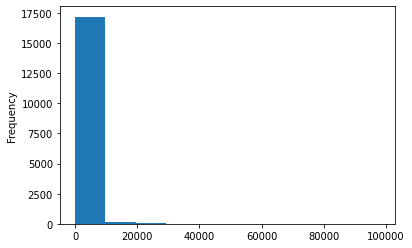

In [24]:
%matplotlib inline
##Your code here
df['messageLength'].plot.hist()

**3g** Make a scatterplot of dollarValueMentionedinMessage and messageLength

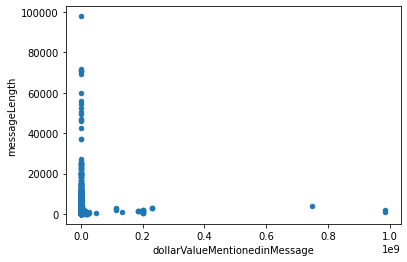

In [25]:
##Your code here
df.plot.scatter(x='dollarValueMentionedinMessage', y='messageLength')


### Part 4 - Selecting rows and columns

**4a** Select just the 'From' column of the data frame

In [26]:
fromColumn=df['From']
fromColumn.head()

0    Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN...
1    Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/...
2    Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C...
3    Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...
4    Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...
Name: From, dtype: object

**4b** Select the 4th row of the dataframe

In [32]:
fourthRow=df.iloc[3]
fourthRow

Subject                                Davis & Company -- incompetence personified
From                             Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS...
To                               Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...
CC                                                                             NaN
BCC                                                                            NaN
Folder                                           \GWHALLE (Non-Privileged)\Markets
Origin                                                                   WHALLEY-G
FileName                                              GWHALLE (Non-Privileged).pst
content                          FYI ---------------------- Forwarded by Richar...
user                                                                     whalley-g
labeled                                                                      False
dollarValueMentionedinMessage                                                   37
mess

**4c** Select only the item in the from column from the fourth row of the data frame

In [33]:
fourthFrom=df['From'][3]
fourthFrom

'Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS/CN=NOTESADDR/CN=6CEDF0C-82C4A03C-8625696C-7693A4>'

### If you have time

Select rows 5 through 7 of the dataframe

In [42]:
fiveThroughSeven= df.iloc[5:8]
fiveThroughSeven

,Subject,From,To,CC,BCC,Folder,Origin,FileName,content,user,labeled,dollarValueMentionedinMessage,messageLength,Date
5,CPUC Proposed Decision Modifying Negative CTC ...,James D Steffes <James D Steffes/NA/Enron@ENRON>,"Steven J Kean <Steven J Kean/NA/Enron@Enron>, ...",NaN,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,In the same Decision that the CPUC is consider...,whalley-g,False,NaN,1793,2001-06-22 01:04:00
6,CPUC Decision Suspending Direct Access,James D Steffes <James D Steffes/NA/Enron@ENRON>,David W Delainey <David W Delainey/HOU/EES@EES...,Harry Kingerski <Harry Kingerski/NA/Enron@Enro...,NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The following points highlight legal/regulator...,whalley-g,False,NaN,2042,2001-06-21 21:29:00
7,California 7/31,"Johnston, Robert </O=ENRON/OU=NA/CN=RECIPIENTS...","Whalley, Greg </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Hickerson, Gary </O=ENRON/OU=NA/CN=RECIPIENTS/...",NaN,\GWHALLE (Non-Privileged)\Markets,WHALLEY-G,GWHALLE (Non-Privileged).pst,The train wreck known as California utility cr...,whalley-g,False,NaN,5417,2001-07-31 22:31:57


Select the to and from columns of the dataframe with a single line of code

In [43]:
toAndFrom=df[['To', 'From']]
toAndFrom.head()

,To,From
0,"Kean, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","Fulton, Donna </O=ENRON/OU=NA/CN=RECIPIENTS/CN..."
1,"Greg Whalley/HOU/ECT@ENRON, Lavorato, John </O...","Delainey, David </O=ENRON/OU=NA/CN=RECIPIENTS/..."
2,"skean@enron.com, Shapiro, Richard </O=ENRON/OU...","Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/C..."
3,"Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS..."
4,"Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Shapiro, Richard </O=ENRON/OU=NA/CN=RECIPIENTS..."


Select the 4th and 5th columns of the dataframe

In [44]:
colsFourAndFive=df.iloc[:,4:6]
colsFourAndFive.head()

,BCC,Folder
0,NaN,\GWHALLE (Non-Privileged)\Markets
1,NaN,\GWHALLE (Non-Privileged)\Markets
2,NaN,\GWHALLE (Non-Privileged)\Markets
3,NaN,\GWHALLE (Non-Privileged)\Markets
4,NaN,\GWHALLE (Non-Privileged)\Markets


Get the average (mean, median, or mode) of the dollarValueMentionedinMessage column

In [45]:
dollarAverage=df['dollarValueMentionedinMessage'].mean()
dollarAverage

3048070.3057040996